In [1]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/andhikarayhan/Data-Analyst-Project/main/Dataset_Project_3.csv')
df.head(5)

,order_id,order_item_id,product_id,price,order_purchase_timestamp,customer_city,customer_state,product_category_name,order_status
0,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,4/26/2017 10:53,santa fe do sul,SP,pet_shop,delivered
1,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,1/14/2018 14:33,para de minas,MG,moveis_decoracao,delivered
2,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,21.90,5/15/2017 21:42,uberaba,MG,utilidades_domesticas,delivered
3,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,145.95,3/19/2018 18:40,santos,SP,beleza_saude,delivered
4,00061f2a7bc09da83e415a52dc8a4af1,1,d63c1011f49d98b976c352955b1c4bea,59.99,3/24/2018 22:16,piracicaba,SP,beleza_saude,delivered


## 1. Trend total penjualan (order_id) berdasarkan order_purchase_timestamp

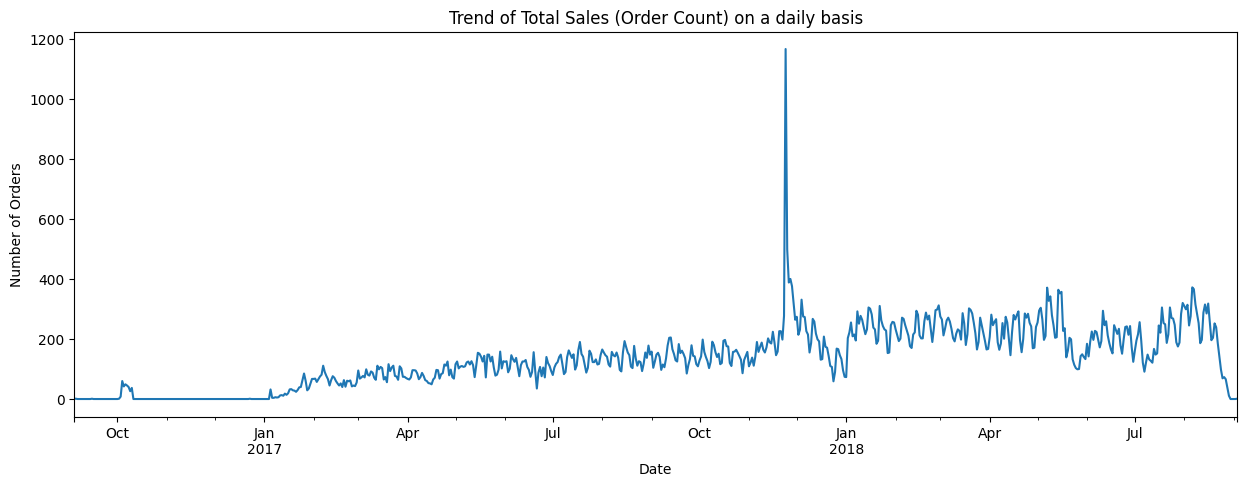

In [4]:
if 'order_purchase_timestamp' not in df.columns:
    df.reset_index(inplace=True)

df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df.set_index('order_purchase_timestamp', inplace=True)

sales_trend = df['order_id'].resample('D').nunique()

plt.figure(figsize=(15, 5))

sales_trend.plot(title='Trend of Total Sales (Order Count) on a daily basis')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.show()

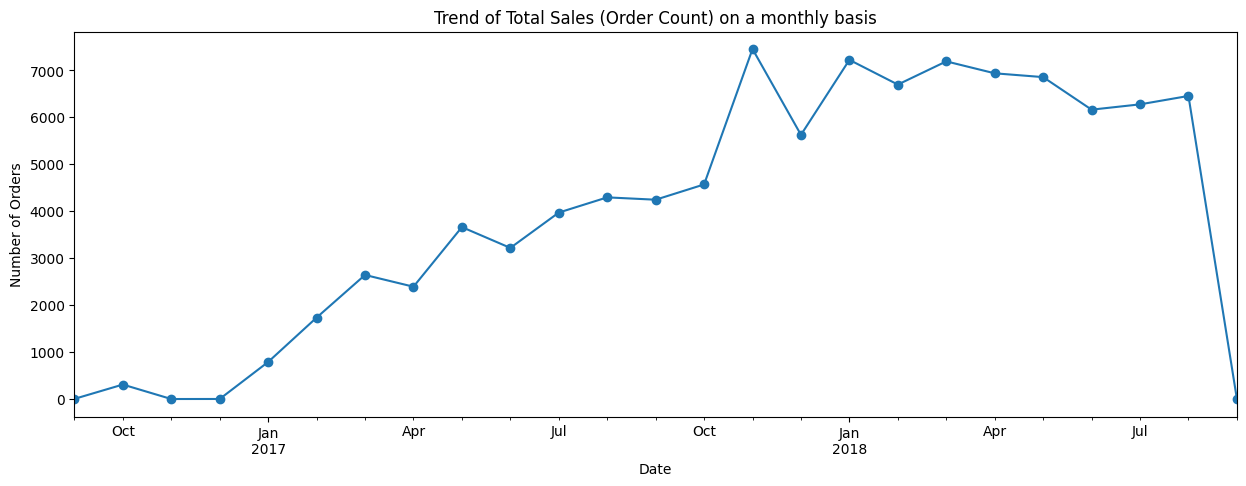

In [5]:
#Trend in a monthly basis
sales_trend = df['order_id'].resample('M').nunique()

plt.figure(figsize=(15, 5))
sales_trend.plot(marker='o', title='Trend of Total Sales (Order Count) on a monthly basis')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.show()

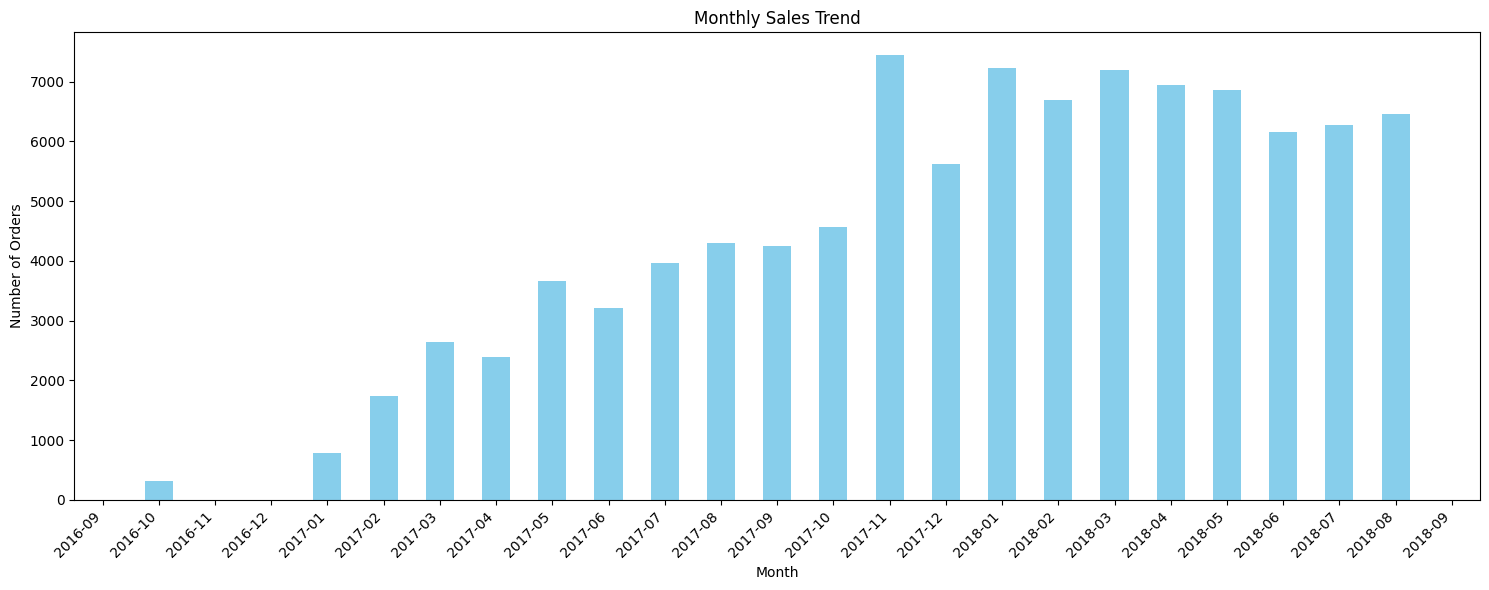

In [6]:
#Monthly basis in a bar chart
sales_trend_monthly = df['order_id'].resample('M').nunique()

plt.figure(figsize=(15, 6))

sales_trend_monthly.plot(kind='bar', color='skyblue')

plt.xticks(
    ticks=range(len(sales_trend_monthly.index)),
    labels=[x.strftime('%Y-%m') for x in sales_trend_monthly.index],
    rotation=45,
    ha='right'
)

plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Monthly Sales Trend')

plt.tight_layout()
plt.show()

# 2. Total price per customer_state menggunakan bar chart

In [7]:
total_price = pd.pivot_table(df, index='customer_state', values='price', aggfunc='sum').reset_index()
total_price = total_price.sort_values(by='price')
total_price

,customer_state,price
21,RR,7829.43
3,AP,13474.30
0,AC,15982.95
2,AM,22356.84
20,RO,46140.64
26,TO,49621.74
24,SE,58920.85
1,AL,80314.81
19,RN,83034.98
16,PI,86914.08


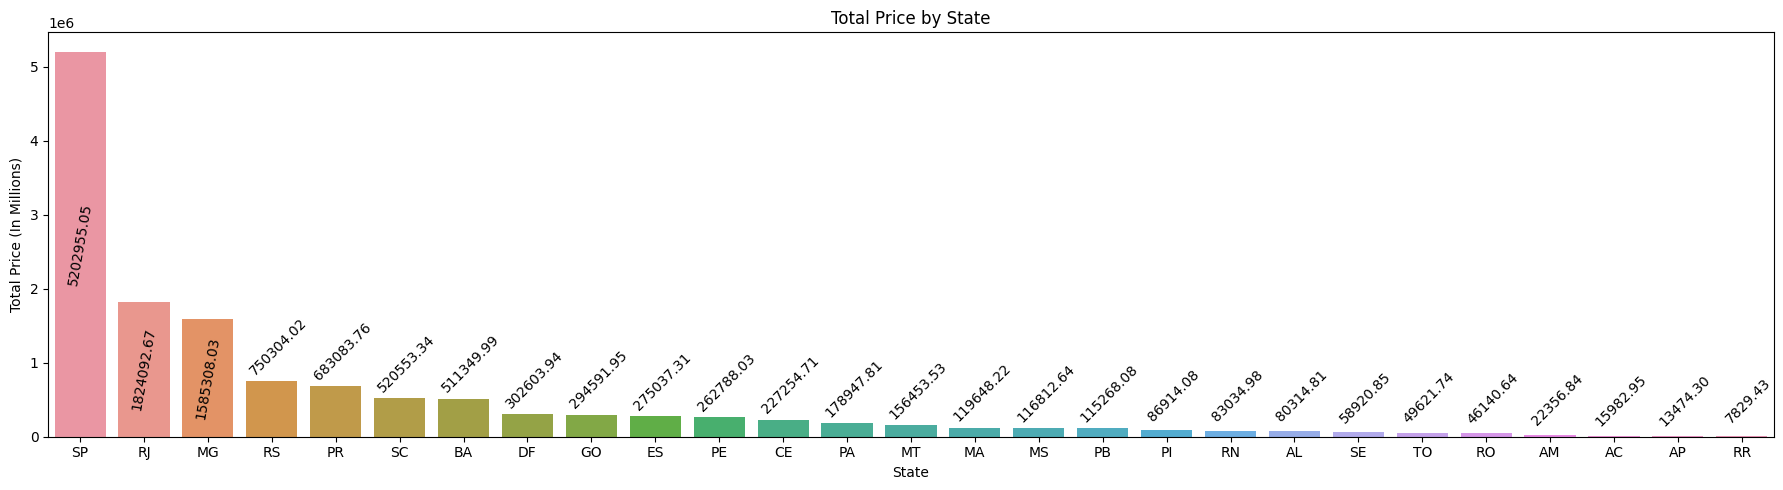

In [8]:
total_price_sorted = total_price.sort_values('price', ascending=False)

plt.figure(figsize=(18, 5))
ax = sns.barplot(x=total_price_sorted['customer_state'], y=total_price_sorted['price'])

#To make the data labels inside the bar for the first 3 largest bars
i = 0
for p in ax.patches:
    if i < 3:
      ax.annotate(format(p.get_height(), '.2f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()/2),
                    ha='center', va='center',
                    xytext=(0, 0), textcoords='offset points',
                    color='black', rotation = 80)
      i+=1
    else:
      ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(5, 25), textcoords='offset points',
                rotation=45)


plt.xlabel('State')
plt.ylabel('Total Price (In Millions)')
plt.title('Total Price by State')

plt.tight_layout()
plt.show()

#3. Tampilkan total penjualan (order_id) berdasarkan order status menggunakan pie chart.

In [9]:
total_sales = pd.pivot_table(df, index='order_status', values='order_id', aggfunc='count').reset_index()
total_sales = total_sales.sort_values(by='order_status')
total_sales

,order_status,order_id
0,approved,3
1,canceled,542
2,delivered,110197
3,invoiced,359
4,processing,357
5,shipped,1185
6,unavailable,7


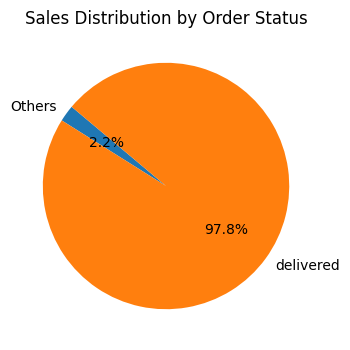

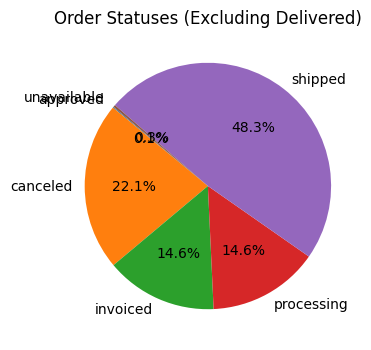

In [10]:
total_sales['grouped_status'] = total_sales['order_status'].apply(lambda x: 'Others' if x != 'delivered' else 'delivered')

grouped_sales = total_sales.groupby('grouped_status')['order_id'].sum().reset_index()

# Main pie chart
plt.figure(figsize=(4, 4))
plt.pie(grouped_sales['order_id'], labels=grouped_sales['grouped_status'], autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Order Status')
plt.show()

#For the 'Others' category
others_df = df[df['order_status'] != 'delivered']

# Pivot table for the 'Others' category
others_sales = pd.pivot_table(others_df, index='order_status', values='order_id', aggfunc='count').reset_index()

#Pie chart for 'Others' category
plt.figure(figsize=(4, 4))
plt.pie(others_sales['order_id'], labels=others_sales['order_status'], autopct='%1.1f%%', startangle=140)
plt.title('Order Statuses (Excluding Delivered)')
plt.show()

# 4. Trend penjualan (order_id) per bulan di tahun 2018 di tiap order status menggunakan stack bar chart.

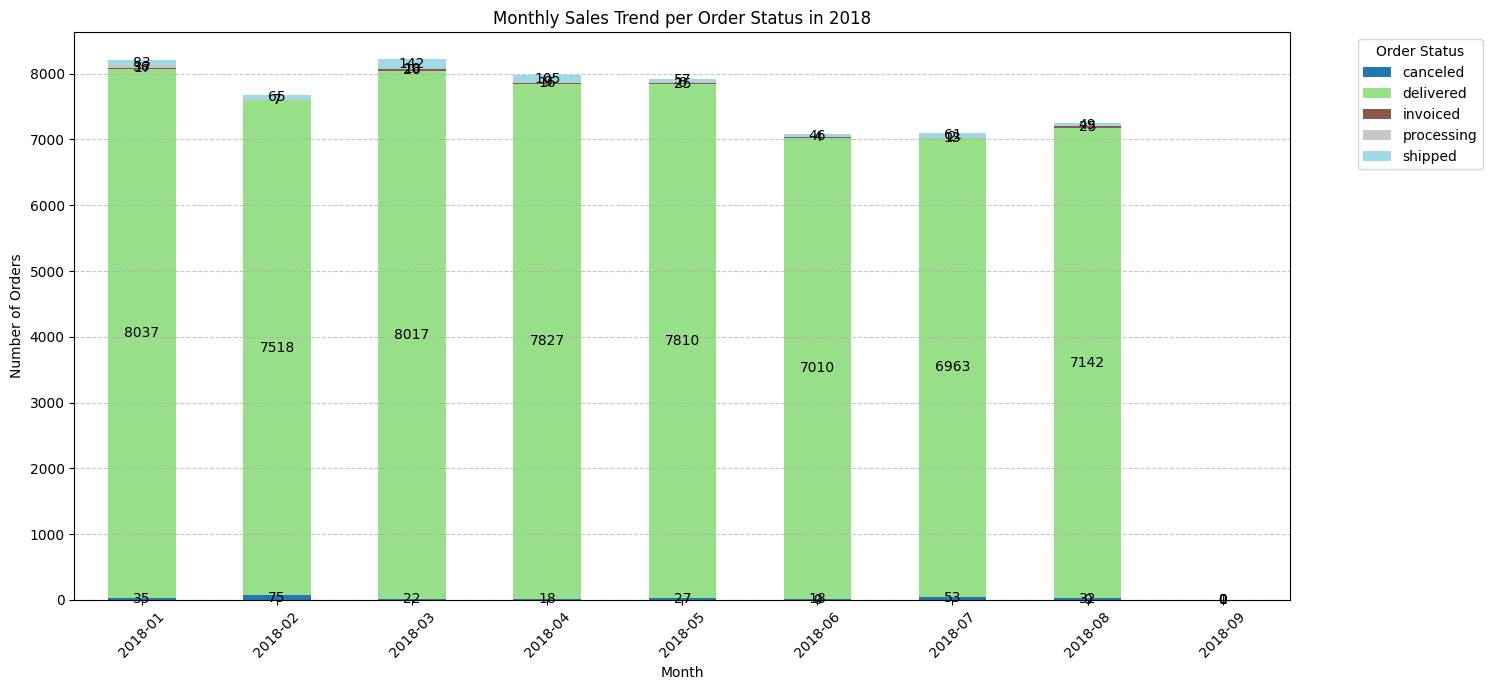

In [19]:
if df.index.name == 'order_purchase_timestamp':
    df.reset_index(inplace=True)

df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Filter for the year 2018
df_2018 = df[df['order_purchase_timestamp'].dt.year == 2018]

df_2018['month'] = df_2018['order_purchase_timestamp'].dt.to_period('M')

monthly_sales = df_2018.groupby(['month', 'order_status'])['order_id'].count().unstack(fill_value=0)

ax = monthly_sales.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='tab20')

# Add labels to each segment
for bar in ax.containers:
    ax.bar_label(bar, label_type='center')

plt.title('Monthly Sales Trend per Order Status in 2018')
plt.xlabel('Month')
plt.ylabel('Number of Orders')

# Improve the legend
plt.legend(title='Order Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()  # Adjust layout
plt.show()